<a href="https://colab.research.google.com/github/ShahnilZulkarnain/SunSpot_Prediction/blob/main/Sunspot_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/LSTM /Monthly sunspot.xlsx")

In [ ]:
df.head()

,Year,Month,Date,Year_frac,Sunspots,Std,Num_obs,Pro_ind
0,1749,1,NaN,1749.042,96.7,-1.0,-1,1
1,1749,2,NaN,1749.123,104.3,-1.0,-1,1
2,1749,3,NaN,1749.204,116.7,-1.0,-1,1
3,1749,4,NaN,1749.288,92.8,-1.0,-1,1
4,1749,5,NaN,1749.371,141.7,-1.0,-1,1


In [ ]:
df1 = df[["Year_frac", "Sunspots"]]

In [ ]:
df1.head()

,Year_frac,Sunspots
0,1749.042,96.7
1,1749.123,104.3
2,1749.204,116.7
3,1749.288,92.8
4,1749.371,141.7


<function matplotlib.pyplot.show(close=None, block=None)>

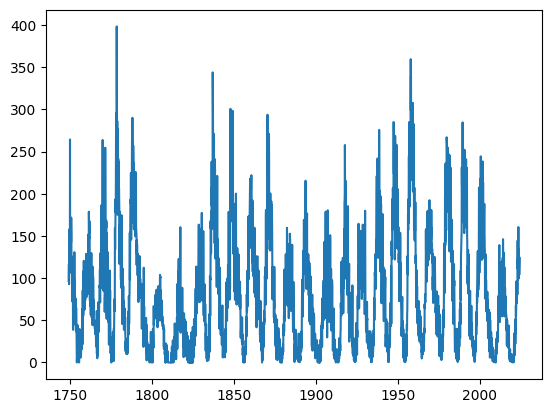

In [ ]:
plt.plot(df1['Year_frac'], df1['Sunspots'])
plt.show

In [ ]:
df1['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

<ipython-input-7-faa53b46ff94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))


In [ ]:
df1.head()

,Year_frac,Sunspots,Date
0,1749.042,96.7,1749-01-01
1,1749.123,104.3,1749-02-01
2,1749.204,116.7,1749-03-01
3,1749.288,92.8,1749-04-01
4,1749.371,141.7,1749-05-01


In [ ]:
df2 = df1[['Date', 'Sunspots']]
df2.head()

,Date,Sunspots
0,1749-01-01,96.7
1,1749-02-01,104.3
2,1749-03-01,116.7
3,1749-04-01,92.8
4,1749-05-01,141.7


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose



In [ ]:
df2 = pd.DataFrame(df2)
df2.set_index('Date',inplace = True)

In [ ]:
df2

,Sunspots
Date,
1749-01-01,96.7
1749-02-01,104.3
1749-03-01,116.7
1749-04-01,92.8
1749-05-01,141.7
...,...
2023-11-01,107.1
2023-12-01,113.5
2024-01-01,123.0


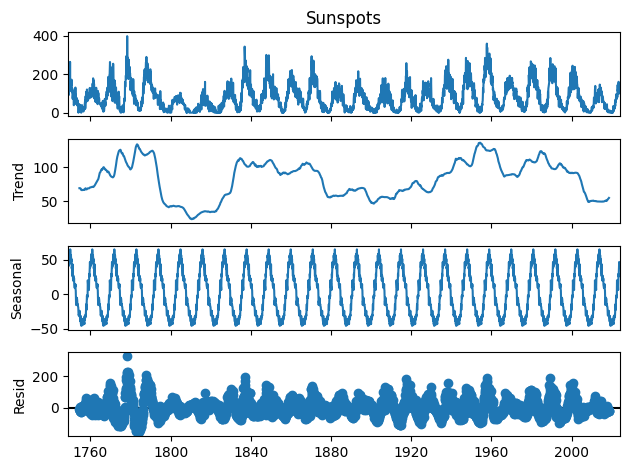

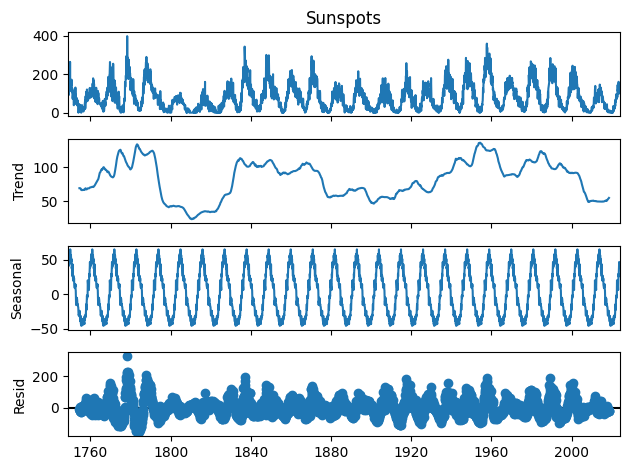

In [ ]:
sd = seasonal_decompose(df2['Sunspots'], model = 'additive', period = 11*12)
sd.plot()

In [ ]:
sd_df = pd.DataFrame(sd.seasonal)

In [ ]:
sd.seasonal

Date
1749-01-01    41.386048
1749-02-01    43.817597
1749-03-01    42.071101
1749-04-01    50.874147
1749-05-01    56.682418
                ...    
2023-11-01    38.877193
2023-12-01    44.868466
2024-01-01    41.386048
2024-02-01    43.817597
2024-03-01    42.071101
Name: seasonal, Length: 3303, dtype: float64

In [ ]:
 len(df2)

3303

In [ ]:
3303-132

3171

In [ ]:
train = df2[:3171]
test = df2[3171:]

In [ ]:
train

,Sunspots
Date,
1749-01-01,96.7
1749-02-01,104.3
1749-03-01,116.7
1749-04-01,92.8
1749-05-01,141.7
...,...
2012-11-01,87.6
2012-12-01,56.8
2013-01-01,96.1


In [ ]:
test

,Sunspots
Date,
2013-04-01,107.3
2013-05-01,120.2
2013-06-01,76.7
2013-07-01,86.2
2013-08-01,91.8
...,...
2023-11-01,107.1
2023-12-01,113.5
2024-01-01,123.0


#Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)
scaler_train = scaler.transform(train)
scaler_test = scaler.transform(test)

In [ ]:
scaler_train[:10]

array([[0.24284279],
       [0.26192868],
       [0.29306881],
       [0.23304872],
       [0.35585133],
       [0.34957308],
       [0.39678553],
       [0.27749874],
       [0.31767956],
       [0.31592165]])

In [ ]:
scaler_test[:10]

array([[0.26946258],
       [0.30185836],
       [0.19261678],
       [0.21647413],
       [0.23053742],
       [0.1368659 ],
       [0.28729282],
       [0.28603717],
       [0.31190357],
       [0.2938222 ]])

#Using Time series Generator

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
scaler_train.shape


(3171, 1)

In [ ]:
#defining Generator
n_input = 11*12 #number of data taken as input
output_length = 12
n_features = 1 # number of features
batch = 1 #number of batch
generator = TimeseriesGenerator(scaler_train, scaler_train, length = n_input,
                                batch_size = batch, sampling_rate = 1, stride = output_length, start_index = 0,
                                end_index = None)

In [ ]:
#see the first outpput
x,y = generator[0]
print(x)
print(y)

[[[0.24284279]
  [0.26192868]
  [0.29306881]
  ...
  [0.0125565 ]
  [0.00703164]
  [0.05725766]]

 [[0.26192868]
  [0.29306881]
  [0.23304872]
  ...
  [0.00703164]
  [0.05725766]
  [0.08663988]]

 [[0.29306881]
  [0.23304872]
  [0.35585133]
  ...
  [0.05725766]
  [0.08663988]
  [0.11175289]]

 ...

 [[0.0100452 ]
  [0.00376695]
  [0.00703164]
  ...
  [0.19211452]
  [0.21998995]
  [0.14264189]]

 [[0.00376695]
  [0.00703164]
  [0.0434455 ]
  ...
  [0.21998995]
  [0.14264189]
  [0.24133601]]

 [[0.00703164]
  [0.0434455 ]
  [0.01029633]
  ...
  [0.14264189]
  [0.24133601]
  [0.15293822]]]
[[0.08663988]
 [0.11175289]
 [0.07860372]
 ...
 [0.24133601]
 [0.15293822]
 [0.19663486]]


In [ ]:
scaler_train[3169]

array([0.15293822])

In [ ]:

print(x[3106])

[[0.00703164]
 [0.0434455 ]
 [0.01029633]
 [0.00728277]
 [0.03892516]
 [0.00904068]
 [0.01155198]
 [0.01305876]
 [0.00150678]
 [0.00075339]
 [0.00301356]
 [0.01054746]
 [0.01657459]
 [0.0025113 ]
 [0.00326469]
 [0.00301356]
 [0.00150678]
 [0.00301356]
 [0.00728277]
 [0.0158212 ]
 [0.01381215]
 [0.        ]
 [0.01783024]
 [0.01933702]
 [0.01732798]
 [0.0409342 ]
 [0.04897037]
 [0.07157207]
 [0.06027122]
 [0.02611753]
 [0.03490708]
 [0.04721246]
 [0.06328478]
 [0.07433451]
 [0.09141135]
 [0.08437971]
 [0.08638875]
 [0.06152687]
 [0.06855851]
 [0.12129583]
 [0.19738825]
 [0.19110999]
 [0.14615771]
 [0.14088398]
 [0.16197891]
 [0.1652436 ]
 [0.30160723]
 [0.31567052]
 [0.34932195]
 [0.27448518]
 [0.2370668 ]
 [0.12004018]
 [0.21747865]
 [0.21572074]
 [0.24234053]
 [0.23103968]
 [0.25138122]
 [0.23807132]
 [0.23530889]
 [0.19211452]
 [0.21998995]
 [0.14264189]
 [0.24133601]
 [0.15293822]]


In [ ]:
x.shape

(3107, 64, 1)

#LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [ ]:
#defining Model

model = Sequential()
model.add(LSTM(64, activation = 'relu',return_sequences = True, input_shape = (n_input,n_features)))
model.add(LSTM(64, activation = 'relu',return_sequences = False))
model.add(Dense(30, activation ='relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(optimizer= 'adam', loss= 'mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 30)                1950      
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 52191 (203.87 KB)
Trainable params: 52191 (203.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#fit model
model.fit(generator, epochs = 500, batch_size = 132)

Epoch 1/500
1/1 [==============================] - 15s 15s/step - loss: 0.0723
Epoch 2/500
1/1 [==============================] - 4s 4s/step - loss: 0.0696
Epoch 3/500
1/1 [==============================] - 5s 5s/step - loss: 0.0670
Epoch 4/500
1/1 [==============================] - 3s 3s/step - loss: 0.0639
Epoch 5/500
1/1 [==============================] - 2s 2s/step - loss: 0.0603
Epoch 6/500
1/1 [==============================] - 3s 3s/step - loss: 0.0564
Epoch 7/500
1/1 [==============================] - 3s 3s/step - loss: 0.0524
Epoch 8/500
1/1 [==============================] - 2s 2s/step - loss: 0.0484
Epoch 9/500
1/1 [==============================] - 2s 2s/step - loss: 0.0443
Epoch 10/500
1/1 [==============================] - 2s 2s/step - loss: 0.0401
Epoch 11/500
1/1 [==============================] - 3s 3s/step - loss: 0.0360
Epoch 12/500
1/1 [==============================] - 3s 3s/step - loss: 0.0317
Epoch 13/500
1/1 [==============================] - 2s 2s/step - loss: 

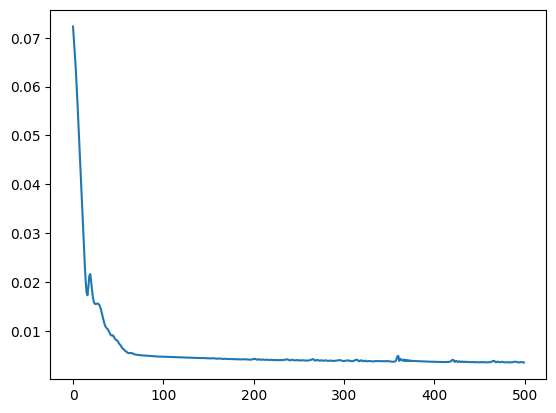

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot (range(len(loss_per_epoch)), loss_per_epoch)

In [ ]:
#Getting prediction for the first test number
last_train_batch = scaler_train[-n_input:]


In [ ]:
last_train_batch

array([[0.0434455 ],
       [0.01029633],
       [0.00728277],
       [0.03892516],
       [0.00904068],
       [0.01155198],
       [0.01305876],
       [0.00150678],
       [0.00075339],
       [0.00301356],
       [0.01054746],
       [0.01657459],
       [0.0025113 ],
       [0.00326469],
       [0.00301356],
       [0.00150678],
       [0.00301356],
       [0.00728277],
       [0.0158212 ],
       [0.01381215],
       [0.        ],
       [0.01783024],
       [0.01933702],
       [0.01732798],
       [0.0409342 ],
       [0.04897037],
       [0.07157207],
       [0.06027122],
       [0.02611753],
       [0.03490708],
       [0.04721246],
       [0.06328478],
       [0.07433451],
       [0.09141135],
       [0.08437971],
       [0.08638875],
       [0.06152687],
       [0.06855851],
       [0.12129583],
       [0.19738825],
       [0.19110999],
       [0.14615771],
       [0.14088398],
       [0.16197891],
       [0.1652436 ],
       [0.30160723],
       [0.31567052],
       [0.349

In [ ]:
last_train_batch= last_train_batch.reshape((1,n_input,n_features))

In [ ]:
last_train_batch

array([[[0.0434455 ],
        [0.01029633],
        [0.00728277],
        [0.03892516],
        [0.00904068],
        [0.01155198],
        [0.01305876],
        [0.00150678],
        [0.00075339],
        [0.00301356],
        [0.01054746],
        [0.01657459],
        [0.0025113 ],
        [0.00326469],
        [0.00301356],
        [0.00150678],
        [0.00301356],
        [0.00728277],
        [0.0158212 ],
        [0.01381215],
        [0.        ],
        [0.01783024],
        [0.01933702],
        [0.01732798],
        [0.0409342 ],
        [0.04897037],
        [0.07157207],
        [0.06027122],
        [0.02611753],
        [0.03490708],
        [0.04721246],
        [0.06328478],
        [0.07433451],
        [0.09141135],
        [0.08437971],
        [0.08638875],
        [0.06152687],
        [0.06855851],
        [0.12129583],
        [0.19738825],
        [0.19110999],
        [0.14615771],
        [0.14088398],
        [0.16197891],
        [0.1652436 ],
        [0

In [ ]:
last_train_batch.shape

(1, 64, 1)

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 395ms/step


array([[0.2160266]], dtype=float32)

In [ ]:
scaler_test[:256]

array([[0.26946258],
       [0.30185836],
       [0.19261678],
       [0.21647413],
       [0.23053742],
       [0.1368659 ],
       [0.28729282],
       [0.28603717],
       [0.31190357],
       [0.2938222 ],
       [0.36690105],
       [0.32320442],
       [0.28252135],
       [0.28252135],
       [0.25841286],
       [0.25163235],
       [0.26845806],
       [0.32646911],
       [0.22601708],
       [0.26017077],
       [0.28352587],
       [0.23355098],
       [0.16750377],
       [0.1368659 ],
       [0.18910095],
       [0.22300352],
       [0.16700151],
       [0.1652436 ],
       [0.16172777],
       [0.19738825],
       [0.15971873],
       [0.15620291],
       [0.14565545],
       [0.14314415],
       [0.14163737],
       [0.13586138],
       [0.0951783 ],
       [0.12933199],
       [0.05148167],
       [0.08136615],
       [0.1260673 ],
       [0.11200402],
       [0.08387745],
       [0.05374184],
       [0.04645907],
       [0.06554495],
       [0.06629834],
       [0.044

#function for the prediction values

In [ ]:
test_predict = []

first_eval_batch = scaler_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range (len(test)):
  #get the prediction value for the first batch
  current_pred = model.predict(current_batch)[0]

  #append the prediction into the array
  test_predict.append(current_pred)

  #use the prediction to update the batch and remove the first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis =1)

1/1 [==============================] - 0s 29ms/step


In [ ]:
test_predict

[array([0.2160266], dtype=float32),
 array([0.22238135], dtype=float32),
 array([0.22642893], dtype=float32),
 array([0.22830611], dtype=float32),
 array([0.22805658], dtype=float32),
 array([0.22637627], dtype=float32),
 array([0.2236807], dtype=float32),
 array([0.22052428], dtype=float32),
 array([0.21759722], dtype=float32),
 array([0.21504375], dtype=float32),
 array([0.21296847], dtype=float32),
 array([0.21136007], dtype=float32),
 array([0.21013683], dtype=float32),
 array([0.20928586], dtype=float32),
 array([0.20864663], dtype=float32),
 array([0.2080769], dtype=float32),
 array([0.20746875], dtype=float32),
 array([0.20672172], dtype=float32),
 array([0.20574716], dtype=float32),
 array([0.20444563], dtype=float32),
 array([0.20286468], dtype=float32),
 array([0.20105705], dtype=float32),
 array([0.19894993], dtype=float32),
 array([0.19649443], dtype=float32),
 array([0.19356433], dtype=float32),
 array([0.19034782], dtype=float32),
 array([0.1869508], dtype=float32),
 arra

In [ ]:
test.head()

,Sunspots
Date,
2013-04-01,107.3
2013-05-01,120.2
2013-06-01,76.7
2013-07-01,86.2
2013-08-01,91.8


In [ ]:
true_predict = scaler.inverse_transform(test_predict)
test['predictions'] = true_predict


<ipython-input-47-003b23335389>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predict


In [ ]:
test.head()

,Sunspots,predictions
Date,,
2013-04-01,107.3,86.021794
2013-05-01,120.2,88.552255
2013-06-01,76.7,90.163998
2013-07-01,86.2,90.911495
2013-08-01,91.8,90.812130


<Axes: xlabel='Date'>

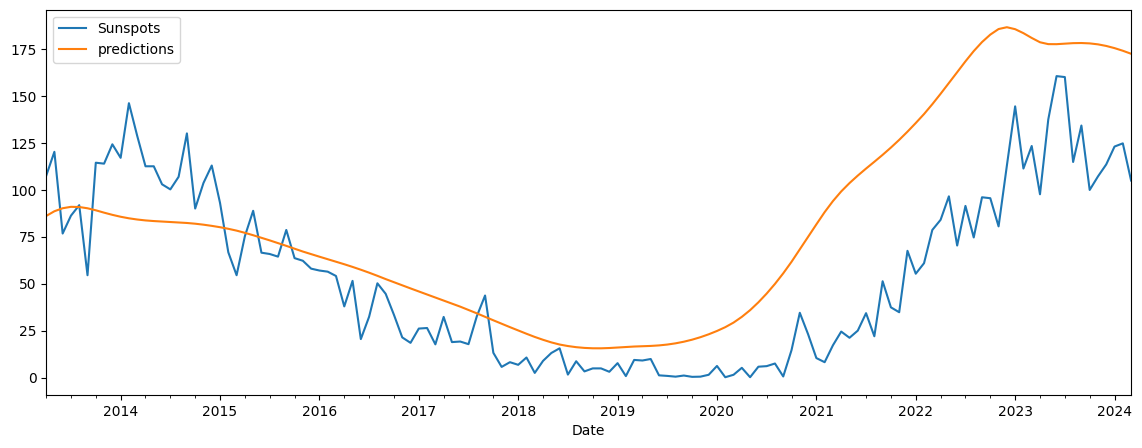

In [ ]:
test.plot(figsize = (14,5))

#how the model predicts training data

In [ ]:
first_train_batch = scaler_train[:n_input]

In [ ]:
first_train_batch

array([[0.24284279],
       [0.26192868],
       [0.29306881],
       [0.23304872],
       [0.35585133],
       [0.34957308],
       [0.39678553],
       [0.27749874],
       [0.31767956],
       [0.31592165],
       [0.66373682],
       [0.35660472],
       [0.30688096],
       [0.31767956],
       [0.37343044],
       [0.36966349],
       [0.37669513],
       [0.41863385],
       [0.35735811],
       [0.43119036],
       [0.38171773],
       [0.27498744],
       [0.26494224],
       [0.31567052],
       [0.29306881],
       [0.18206931],
       [0.18960321],
       [0.23606228],
       [0.25414365],
       [0.21220492],
       [0.27749874],
       [0.2503767 ],
       [0.09844299],
       [0.09718734],
       [0.11928679],
       [0.18407835],
       [0.14640884],
       [0.20919136],
       [0.29708689],
       [0.24811652],
       [0.24987443],
       [0.16574586],
       [0.32822702],
       [0.12255148],
       [0.1135108 ],
       [0.19512808],
       [0.15745856],
       [0.167

In [ ]:
first_train_batch= first_train_batch.reshape((1,n_input,n_features))


In [ ]:
first_train_batch

array([[[0.24284279],
        [0.26192868],
        [0.29306881],
        [0.23304872],
        [0.35585133],
        [0.34957308],
        [0.39678553],
        [0.27749874],
        [0.31767956],
        [0.31592165],
        [0.66373682],
        [0.35660472],
        [0.30688096],
        [0.31767956],
        [0.37343044],
        [0.36966349],
        [0.37669513],
        [0.41863385],
        [0.35735811],
        [0.43119036],
        [0.38171773],
        [0.27498744],
        [0.26494224],
        [0.31567052],
        [0.29306881],
        [0.18206931],
        [0.18960321],
        [0.23606228],
        [0.25414365],
        [0.21220492],
        [0.27749874],
        [0.2503767 ],
        [0.09844299],
        [0.09718734],
        [0.11928679],
        [0.18407835],
        [0.14640884],
        [0.20919136],
        [0.29708689],
        [0.24811652],
        [0.24987443],
        [0.16574586],
        [0.32822702],
        [0.12255148],
        [0.1135108 ],
        [0

In [ ]:
model.predict(first_train_batch)

1/1 [==============================] - 0s 27ms/step


array([[0.04478376]], dtype=float32)

In [ ]:
scaler_train[0:133]

array([[0.24284279],
       [0.26192868],
       [0.29306881],
       [0.23304872],
       [0.35585133],
       [0.34957308],
       [0.39678553],
       [0.27749874],
       [0.31767956],
       [0.31592165],
       [0.66373682],
       [0.35660472],
       [0.30688096],
       [0.31767956],
       [0.37343044],
       [0.36966349],
       [0.37669513],
       [0.41863385],
       [0.35735811],
       [0.43119036],
       [0.38171773],
       [0.27498744],
       [0.26494224],
       [0.31567052],
       [0.29306881],
       [0.18206931],
       [0.18960321],
       [0.23606228],
       [0.25414365],
       [0.21220492],
       [0.27749874],
       [0.2503767 ],
       [0.09844299],
       [0.09718734],
       [0.11928679],
       [0.18407835],
       [0.14640884],
       [0.20919136],
       [0.29708689],
       [0.24811652],
       [0.24987443],
       [0.16574586],
       [0.32822702],
       [0.12255148],
       [0.1135108 ],
       [0.19512808],
       [0.15745856],
       [0.167

In [ ]:
scaler_train.shape

(3171, 1)

In [ ]:
train_predict = []

first_eval_batch1 = scaler_train[:n_input]
current_batch1 = first_eval_batch1.reshape((1,n_input,n_features))

for i in range (len(train)):
  #get the prediction value for the first batch
  current_pred1 = model.predict(current_batch1)[0]

  #append the prediction into the array
  train_predict.append(current_pred1)

  #use the prediction to update the batch and remove the first value
  current_batch1 = np.append(current_batch1[:,1:,:],[[current_pred1]], axis =1)


1/1 [==============================] - 0s 41ms/step


In [ ]:
"""train_predict = []

first_eval_batch1 = scaler_train[:n_input]
current_batch1 = first_eval_batch1.reshape((1,n_input,n_features))

for i in range (len(train)):
  #get the prediction value for the first batch
  current_pred1 = model.predict(current_batch1)[0]

  #append the prediction into the array
  train_predict.append(current_pred1)

  #use the prediction to update the batch and remove the first value
  current_batch1 = scaler_train[i+1 : n_input +1 +i].reshape((1,n_input,n_features))"""

'train_predict = []\n\nfirst_eval_batch1 = scaler_train[:n_input]\ncurrent_batch1 = first_eval_batch1.reshape((1,n_input,n_features))\n\nfor i in range (len(train)):\n  #get the prediction value for the first batch\n  current_pred1 = model.predict(current_batch1)[0]\n\n  #append the prediction into the array\n  train_predict.append(current_pred1)\n\n  #use the prediction to update the batch and remove the first value\n  current_batch1 = scaler_train[i+1 : n_input +1 +i].reshape((1,n_input,n_features))'

In [ ]:
train_predict

[array([0.04478376], dtype=float32),
 array([0.04566393], dtype=float32),
 array([0.04517457], dtype=float32),
 array([0.04300934], dtype=float32),
 array([0.04009955], dtype=float32),
 array([0.03919157], dtype=float32),
 array([0.0381486], dtype=float32),
 array([0.03711513], dtype=float32),
 array([0.0362789], dtype=float32),
 array([0.03602876], dtype=float32),
 array([0.03649403], dtype=float32),
 array([0.03731339], dtype=float32),
 array([0.0388423], dtype=float32),
 array([0.04085752], dtype=float32),
 array([0.04322084], dtype=float32),
 array([0.04557796], dtype=float32),
 array([0.04837621], dtype=float32),
 array([0.05180983], dtype=float32),
 array([0.0559502], dtype=float32),
 array([0.06095962], dtype=float32),
 array([0.06664208], dtype=float32),
 array([0.07321119], dtype=float32),
 array([0.08075209], dtype=float32),
 array([0.08992863], dtype=float32),
 array([0.10143524], dtype=float32),
 array([0.11491022], dtype=float32),
 array([0.1305902], dtype=float32),
 array

In [ ]:
len(train_predict)

3171

In [ ]:
type(train)

pandas.core.frame.DataFrame

In [ ]:
true_train_predict = scaler.inverse_transform(train_predict)

In [ ]:
true_train_predict

array([[ 17.83289466],
       [ 18.18337712],
       [ 17.98851333],
       ...,
       [117.18899806],
       [113.89009464],
       [110.60722392]])

In [ ]:
true_train_predict.shape

(3171, 1)

In [ ]:
zeros_array = np.zeros((264,1))
array_with_zeros = np.concatenate((zeros_array, true_train_predict))

In [ ]:
array_with_zeros

array([[  0.        ],
       [  0.        ],
       [  0.        ],
       ...,
       [117.18899806],
       [113.89009464],
       [110.60722392]])

In [ ]:
array_with_zeros_trimmed = array_with_zeros[:-264]

In [ ]:
array_with_zeros_trimmed.shape

(3171, 1)

In [ ]:
train.shape

(3171, 1)

In [ ]:
#train1 = train[:3040]
train1 = train

In [ ]:
 train1['predictions'] = array_with_zeros_trimmed


<ipython-input-71-5213f8f2551f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['predictions'] = array_with_zeros_trimmed


In [ ]:
train1

,Sunspots,predictions
Date,,
1749-01-01,96.7,0.000000
1749-02-01,104.3,0.000000
1749-03-01,116.7,0.000000
1749-04-01,92.8,0.000000
1749-05-01,141.7,0.000000
...,...,...
2012-11-01,87.6,151.261112
2012-12-01,56.8,147.213703
2013-01-01,96.1,143.179265


In [ ]:
train.tail(10)

,Sunspots,predictions
Date,,
2012-06-01,92.0,166.564403
2012-07-01,100.1,164.124026
2012-08-01,94.8,161.682973
2012-09-01,93.7,158.884632
2012-10-01,76.5,155.208918
2012-11-01,87.6,151.261112
2012-12-01,56.8,147.213703
2013-01-01,96.1,143.179265
2013-02-01,60.9,139.234485


<Axes: xlabel='Date'>

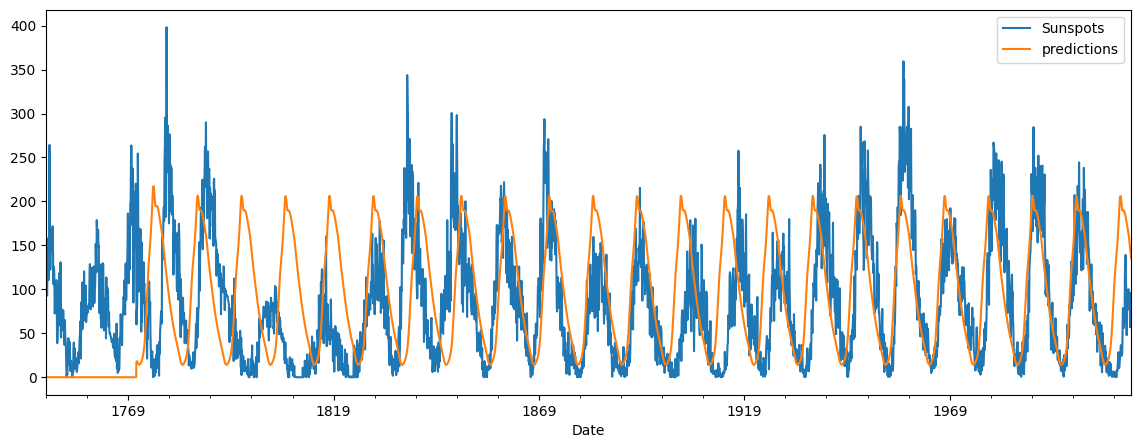

In [ ]:
train1.plot(figsize = (14,5))